In [1]:
import pandas as pd

import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

import acquire as a
import prepare as p

In [2]:
df = a.merge_zach()

In [3]:
df.head(2)

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,Unnamed: 0,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode
0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


Exercises
The end result of this exercise should be a file named `prepare.py`.

Using your store items data:

# 1. Convert date column to datetime format.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_brand     913000 non-null  object 
 1   item_id        913000 non-null  int64  
 2   item_name      913000 non-null  object 
 3   item_price     913000 non-null  float64
 4   item_upc12     913000 non-null  object 
 5   item_upc14     913000 non-null  object 
 6   Unnamed: 0     913000 non-null  int64  
 7   sale_amount    913000 non-null  float64
 8   sale_date      913000 non-null  object 
 9   sale_id        913000 non-null  int64  
 10  store_address  913000 non-null  object 
 11  store_city     913000 non-null  object 
 12  store_id       913000 non-null  int64  
 13  store_state    913000 non-null  object 
 14  store_zipcode  913000 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 111.5+ MB


In [5]:
#change dtype to datetime
df.sale_date = pd.to_datetime(df.sale_date)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   item_brand     913000 non-null  object             
 1   item_id        913000 non-null  int64              
 2   item_name      913000 non-null  object             
 3   item_price     913000 non-null  float64            
 4   item_upc12     913000 non-null  object             
 5   item_upc14     913000 non-null  object             
 6   Unnamed: 0     913000 non-null  int64              
 7   sale_amount    913000 non-null  float64            
 8   sale_date      913000 non-null  datetime64[ns, UTC]
 9   sale_id        913000 non-null  int64              
 10  store_address  913000 non-null  object             
 11  store_city     913000 non-null  object             
 12  store_id       913000 non-null  int64              
 13  store_state    913000 non-nul

In [7]:
#set index to date
df = df.set_index('sale_date').sort_index()

In [8]:
df.head(2)

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,Unnamed: 0,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,0,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-01 00:00:00+00:00,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,295812,26.0,295813,2118 Fredericksburg Rdj,San Antonio,3,TX,78201


In [9]:
df.index.tz_localize(None)

DatetimeIndex(['2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01',
               ...
               '2017-12-31', '2017-12-31', '2017-12-31', '2017-12-31',
               '2017-12-31', '2017-12-31', '2017-12-31', '2017-12-31',
               '2017-12-31', '2017-12-31'],
              dtype='datetime64[ns]', name='sale_date', length=913000, freq=None)

In [10]:
df.index = df.index.tz_localize(None)

In [11]:
df.head(2)

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,Unnamed: 0,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,
2013-01-01,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,0,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-01,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,295812,26.0,295813,2118 Fredericksburg Rdj,San Antonio,3,TX,78201


# 2. Plot the distribution of sale_amount and item_price.

<AxesSubplot:>

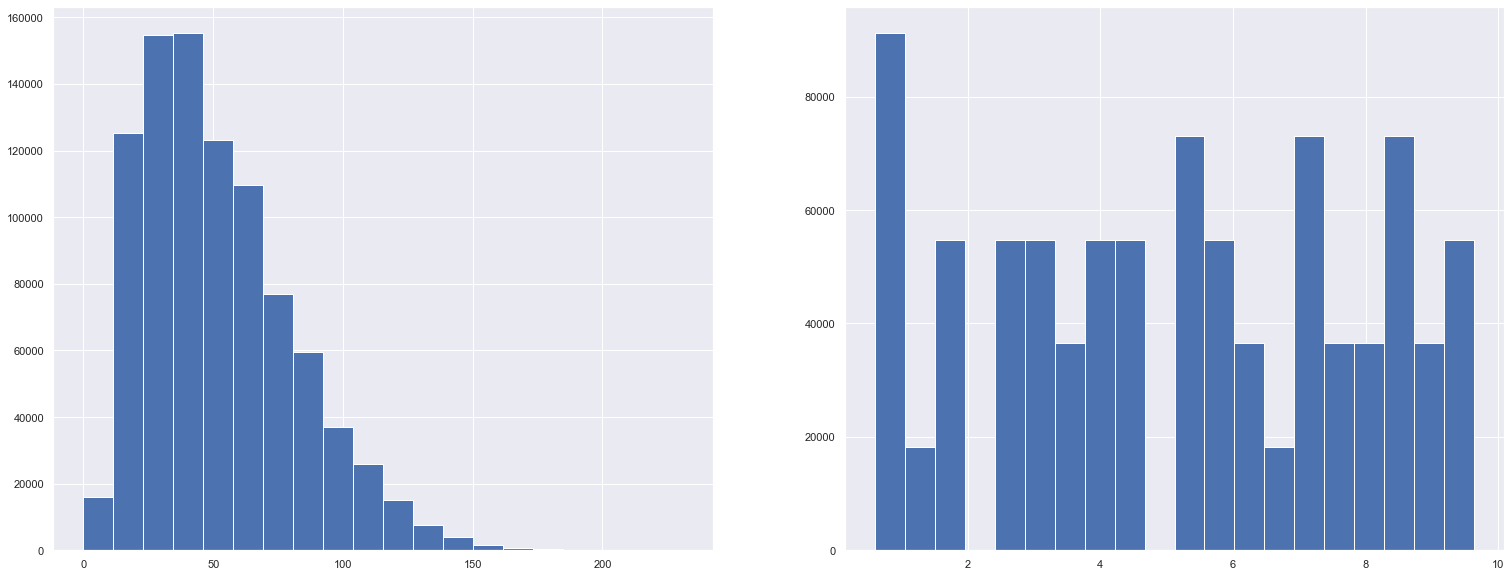

In [27]:
plt.figure(figsize=(26, 10))
plt.subplot(121)
df.sale_amount.hist(bins = 20)


plt.subplot(122)
df.item_price.hist(bins = 20)


# 3. Set the index to be the datetime variable.

In [31]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

# 4. Add a 'month' and 'day of week' column to your dataframe.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_brand     913000 non-null  object 
 1   item_id        913000 non-null  int64  
 2   item_name      913000 non-null  object 
 3   item_price     913000 non-null  float64
 4   item_upc12     913000 non-null  object 
 5   item_upc14     913000 non-null  object 
 6   Unnamed: 0     913000 non-null  int64  
 7   sale_amount    913000 non-null  float64
 8   sale_id        913000 non-null  int64  
 9   store_address  913000 non-null  object 
 10  store_city     913000 non-null  object 
 11  store_id       913000 non-null  int64  
 12  store_state    913000 non-null  object 
 13  store_zipcode  913000 non-null  object 
dtypes: float64(2), int64(4), object(8)
memory usage: 104.5+ MB


In [35]:
df['month'] = df.index.month

In [37]:
df['day_of_week'] = df.index.day_name()

In [38]:
df.head(2)

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,Unnamed: 0,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week
sale_date,,,,,,,,,,,,,,,,
2013-01-01,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,0,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,Tuesday
2013-01-01,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,295812,26.0,295813,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,Tuesday


# 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [39]:
df['sales_total'] = df.sale_amount * df.item_price

In [41]:
df.head(2).T

sale_date,2013-01-01,2013-01-01
item_brand,Riceland,Ducal
item_id,1,17
item_name,Riceland American Jazmine Rice,Ducal Refried Red Beans
item_price,0.84,1.16
item_upc12,35200264013,88313590791
item_upc14,35200264013,88313590791
Unnamed: 0,0,295812
sale_amount,13,26
sale_id,1,295813
store_address,12125 Alamo Ranch Pkwy,2118 Fredericksburg Rdj


# 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [2]:
df = a.merge_zach()

In [3]:
df = p.prep_zstore(df)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_brand     913000 non-null  object 
 1   item_id        913000 non-null  int64  
 2   item_name      913000 non-null  object 
 3   item_price     913000 non-null  float64
 4   item_upc12     913000 non-null  object 
 5   item_upc14     913000 non-null  object 
 6   Unnamed: 0     913000 non-null  int64  
 7   sale_amount    913000 non-null  float64
 8   sale_id        913000 non-null  int64  
 9   store_address  913000 non-null  object 
 10  store_city     913000 non-null  object 
 11  store_id       913000 non-null  int64  
 12  store_state    913000 non-null  object 
 13  store_zipcode  913000 non-null  object 
 14  month          913000 non-null  int64  
 15  day_of_week    913000 non-null  object 
 16  sales_total    913000 non-null  float64
dtypes: float64(3)

In [5]:
df.head(2).T

sale_date,2013-01-01,2013-01-01
item_brand,Riceland,Ducal
item_id,1,17
item_name,Riceland American Jazmine Rice,Ducal Refried Red Beans
item_price,0.84,1.16
item_upc12,35200264013,88313590791
item_upc14,35200264013,88313590791
Unnamed: 0,0,295812
sale_amount,13,26
sale_id,1,295813
store_address,12125 Alamo Ranch Pkwy,2118 Fredericksburg Rdj


Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

# 1. Convert date column to datetime format.

In [6]:
opsd = a.get_opsd()

In [7]:
opsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [8]:
opsd = opsd.set_index('Date').sort_index()

In [9]:
opsd.head(2)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN


# 2. Plot the distribution of each of your variables.

Text(0.5, 0, 'Wind+Solar')

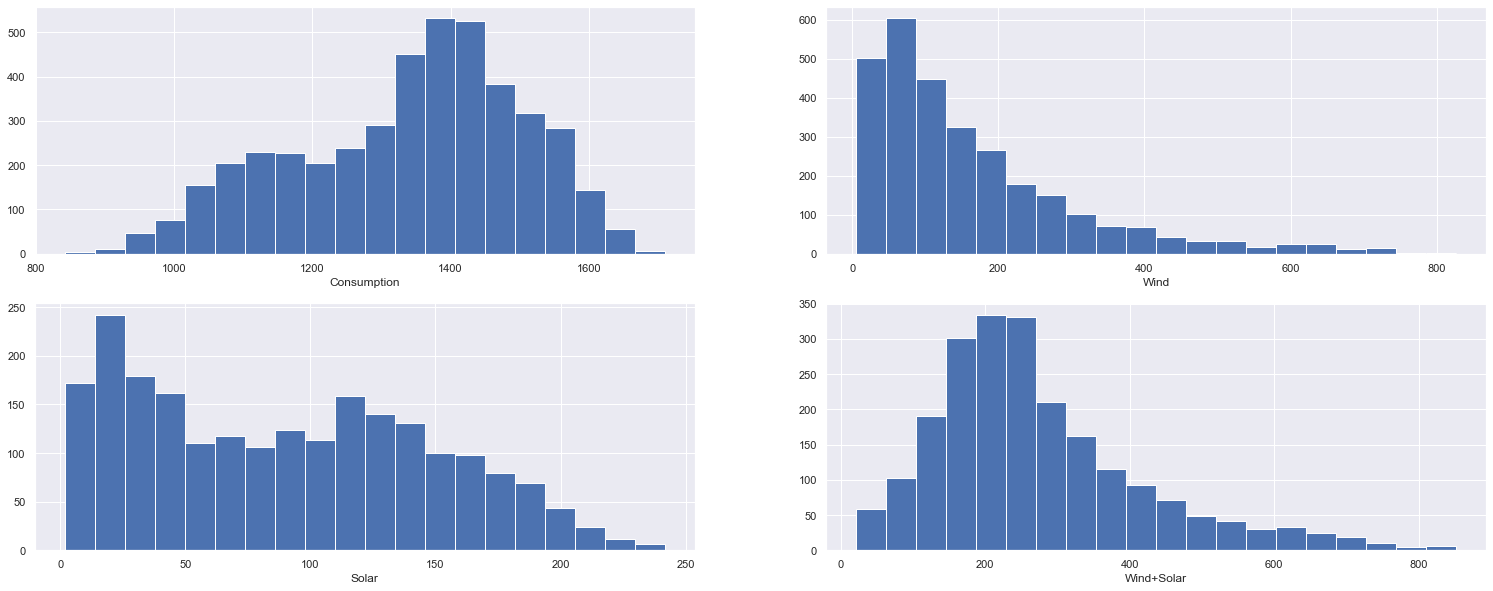

In [12]:
plt.figure(figsize=(26, 10))
plt.subplot(221)
opsd.Consumption.hist(bins = 20)
plt.xlabel("Consumption")

plt.subplot(222)
opsd.Wind.hist(bins = 20)
plt.xlabel("Wind")

plt.subplot(223)
opsd.Solar.hist(bins = 20)
plt.xlabel("Solar")

plt.subplot(224)
opsd['Wind+Solar'].hist(bins = 20)
plt.xlabel("Wind+Solar")

# 3. Set the index to be the datetime variable.

In [13]:
type(opsd.index)

pandas.core.indexes.base.Index

In [14]:
#change dtype to datetime
opsd.index = pd.to_datetime(opsd.index)

In [15]:
type(opsd.index)

pandas.core.indexes.datetimes.DatetimeIndex

# 4. Add a month and a year column to your dataframe.

In [16]:
opsd['month'] = opsd.index.month

In [17]:
opsd.head(2).T

Date,2006-01-01,2006-01-02
Consumption,1069.184,1380.521
Wind,NaN,NaN
Solar,NaN,NaN
Wind+Solar,NaN,NaN
month,1.000,1.000


In [20]:
opsd['year'] = opsd.index.year


In [21]:
opsd.head(2).T

Date,2006-01-01,2006-01-02
Consumption,1069.184,1380.521
Wind,NaN,NaN
Solar,NaN,NaN
Wind+Solar,NaN,NaN
month,1.000,1.000
year,2006.000,2006.000


# 5. Fill any missing values.

Text(0.5, 0, 'Wind+Solar')

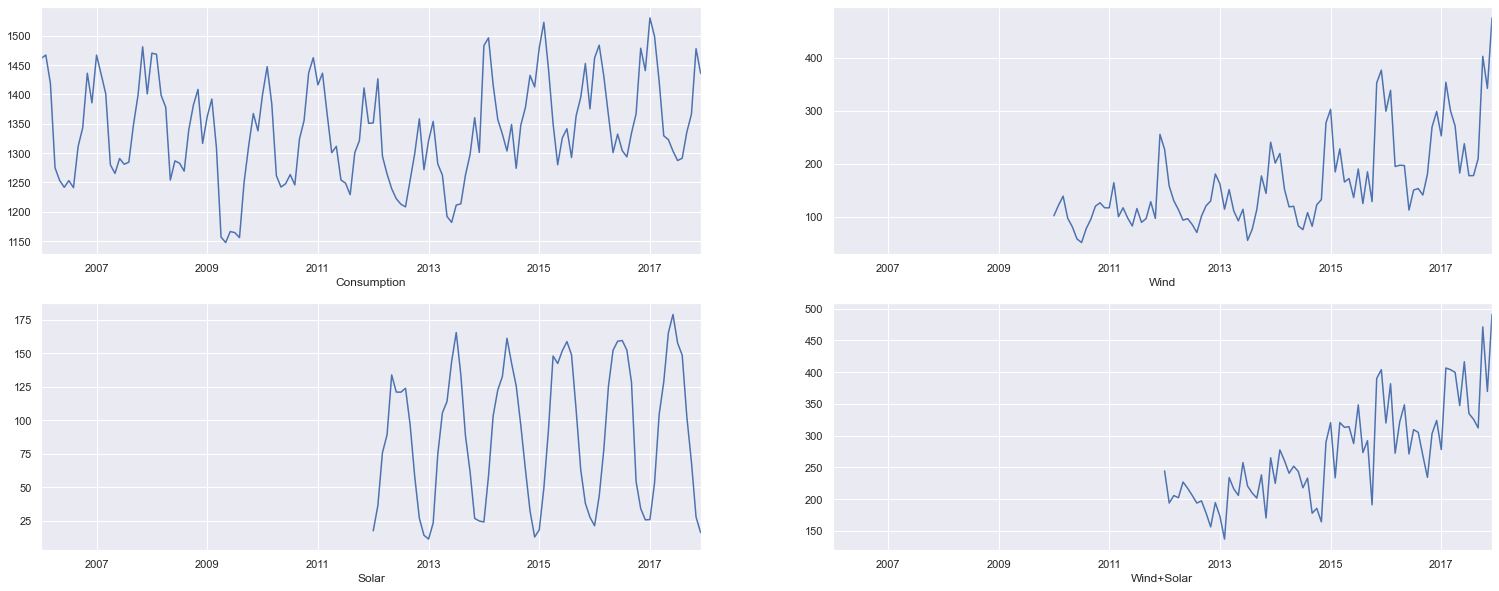

In [28]:
plt.figure(figsize=(26, 10))
plt.subplot(221)
opsd.resample('M').mean().Consumption.plot()
plt.xlabel("Consumption")

plt.subplot(222)
opsd.resample('M').mean().Wind.plot()
plt.xlabel("Wind")

plt.subplot(223)
opsd.resample('M').mean().Solar.plot()
plt.xlabel("Solar")

plt.subplot(224)
opsd.resample('M').mean()['Wind+Solar'].plot()
plt.xlabel("Wind+Solar")

In [22]:
opsd.isnull().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64

In [23]:
opsd[opsd.Wind.isnull()]

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006
...,...,...,...,...,...,...
2009-12-29,1207.905,NaN,NaN,NaN,12,2009
2009-12-30,1192.196,NaN,NaN,NaN,12,2009
2009-12-31,1106.467,NaN,NaN,NaN,12,2009


In [24]:
opsd.Wind.describe()

count    2920.000000
mean      164.814173
std       143.692732
min         5.757000
25%        62.353250
50%       119.098000
75%       217.900250
max       826.278000
Name: Wind, dtype: float64

In [30]:
opsd = opsd.fillna(0)

In [31]:
opsd.isnull().sum()

Consumption    0
Wind           0
Solar          0
Wind+Solar     0
month          0
year           0
dtype: int64

# 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [2]:
opsd = a.get_opsd()

In [3]:
opsd = p.prep_opsd(opsd)

In [4]:
opsd.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,2006


In [5]:
opsd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         4383 non-null   float64
 2   Solar        4383 non-null   float64
 3   Wind+Solar   4383 non-null   float64
 4   month        4383 non-null   int64  
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 239.7 KB
